In [15]:
import numpy as np
import pandas as pd
from time import time

def matvec(matrix, vector):
    result = np.zeros(vector.shape)
    for i in range(matrix.shape[0]):
        for j in range(vector.shape[0]):
            result[i] += matrix[i, j] * vector[j]
    return result    
    
def profile_matvec(NROWS):
    times = []
    for nrows in NROWS:
        vector = np.random.rand(nrows, nrows)
        matrix = np.random.rand(nrows, nrows)
        start = time()
        y = matvec(matrix, vector)
        end = time()
        times.append((end - start) * 1e6)  # Convert to microseconds
    return times

NROWS = [100, 200, 300, 500, 800, 1000]
times = profile_matvec(NROWS)

df_py = pd.DataFrame({'NROWS': NROWS, 'Time': times})
df_py

,NROWS,Time
0,100,1.537609e+04
1,200,6.197834e+04
2,300,1.439817e+05
3,500,4.205134e+05
4,800,1.231422e+06
5,1000,2.049022e+06


Polynomial Fit Equation: Poly(2.48920478786194*x**2 - 503.468438584537*x + 54877.6961902885, x, domain='RR')


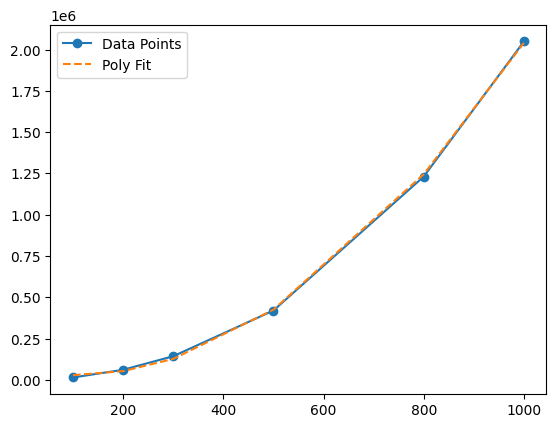

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def plot_polynomial_fit(df):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df['NROWS'], df['Time'], 2)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    plt.plot(df['NROWS'], df['Time'], marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    plt.plot(df['NROWS'], poly(df['NROWS']), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()

plot_polynomial_fit(df_py)

In [17]:
!make run

./matvec
NROWS,Time
100,4
200,22
300,54
500,158
800,421
1000,664
2000,2845
5000,17532
10000,72882
15000,164951
20000,302901
25000,458189
30000,662984
Results written to output.txt


Polynomial Fit Equation: Poly(0.000730167240553912*x**2 + 0.214117878471148*x - 419.841197282192, x, domain='RR')


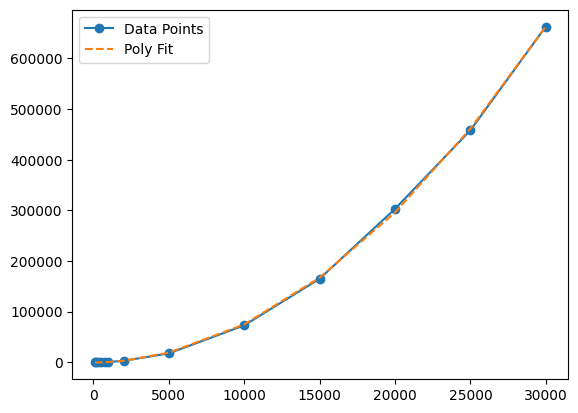

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the output file
df_cpp = pd.read_csv('output.txt')
df_cpp.head()

plot_polynomial_fit(df_cpp)

In [19]:
df_merged = pd.merge(df_py, df_cpp, on='NROWS', suffixes=['_py', '_cpp'])
df_merged['speedup'] = df_merged['Time_py'] / df_merged['Time_cpp']
df_merged

,NROWS,Time_py,Time_cpp,speedup
0,100,1.537609e+04,4,3844.022751
1,200,6.197834e+04,22,2817.197279
2,300,1.439817e+05,54,2666.327688
3,500,4.205134e+05,158,2661.477161
4,800,1.231422e+06,421,2924.992749
5,1000,2.049022e+06,664,3085.876445


In [20]:
def matvec_numpy(NROWS):
    times = []
    for nrows in NROWS:
        vector = np.random.rand(nrows, nrows)
        matrix = np.random.rand(nrows, nrows)
        start = time()
        y = matrix @ vector
        end = time()
        times.append((end - start) * 1e6)  # Convert to microseconds
    return times

NROWS = [100, 200, 300, 500, 800, 1000, 2000, 5000]
times = matvec_numpy(NROWS)
df_np = pd.DataFrame({'NROWS': NROWS, 'Time': times})
df_np

,NROWS,Time
0,100,5.722046e+02
1,200,1.113105e+04
2,300,2.088761e+04
3,500,1.835370e+04
4,800,5.198002e+03
5,1000,1.091719e+04
6,2000,9.265900e+04
7,5000,1.021070e+06


In [21]:
df_merged_np = pd.merge(df_np, df_cpp, on='NROWS', suffixes=['_np', '_cpp'])
df_merged_np['speedup'] = df_merged_np['Time_np'] / df_merged_np['Time_cpp']
df_merged_np

,NROWS,Time_np,Time_cpp,speedup
0,100,5.722046e+02,4,143.051147
1,200,1.113105e+04,22,505.956736
2,300,2.088761e+04,54,386.807654
3,500,1.835370e+04,158,116.162662
4,800,5.198002e+03,421,12.346798
5,1000,1.091719e+04,664,16.441546
6,2000,9.265900e+04,2845,32.569067
7,5000,1.021070e+06,17532,58.240333
